In [1]:
import pickle
import numpy as np

In [15]:
with open("feedback_debug/ppo_HalfCheetah-v5_1111.pkl", "rb" ) as stuff:
    data = pickle.load(stuff)

In [16]:
data.keys()

dict_keys(['segments', 'ratings', 'preferences', 'demos', 'corrections', 'description', 'description_preference', 'opt_gaps'])

In [17]:
len(data["segments"])

960

In [18]:
import matplotlib.pyplot as plt

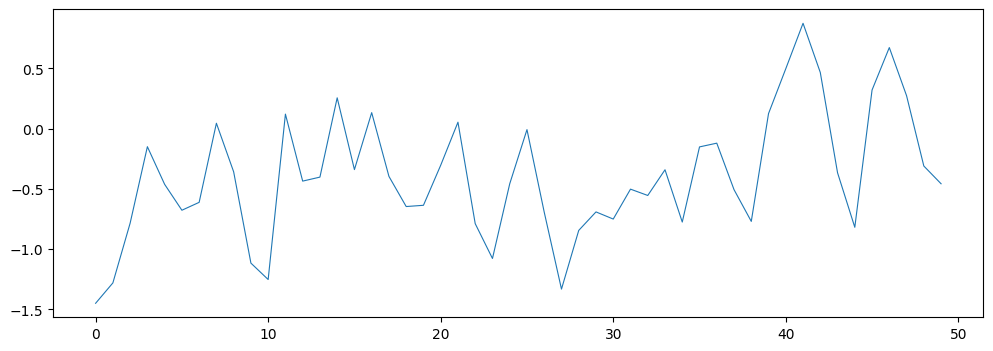

In [19]:
plt.figure(figsize=(12, 4))
plt.plot([d[2] for d in data["segments"][0]], linestyle='-', linewidth=0.8, label="Reward")

In [20]:
data["ratings"]

array([3, 4, 4, 3, 4, 5, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4,
       5, 3, 3, 3, 3, 3, 2, 5, 3, 4, 5, 3, 5, 3, 4, 3, 3, 4, 4, 4, 4, 4,
       5, 5, 6, 7, 5, 5, 6, 6, 4, 7, 5, 4, 6, 5, 5, 4, 4, 8, 8, 6, 7, 5,
       5, 6, 6, 3, 6, 6, 6, 6, 6, 4, 4, 6, 6, 4, 5, 5, 5, 4, 5, 6, 5, 3,
       4, 4, 4, 5, 5, 6, 5, 6, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4,
       4, 5, 4, 4, 3, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4,
       5, 3, 5, 5, 3, 4, 4, 7, 4, 7, 4, 5, 4, 5, 5, 6, 4, 4, 5, 4, 5, 5,
       4, 4, 4, 4, 5, 5, 5, 4, 5, 4, 4, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 4, 5, 5, 5, 5, 4, 5, 8, 4, 8, 4, 4, 4, 4, 5, 5, 4, 4, 5, 4,
       5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 3, 5, 4, 4, 5, 4, 4, 4, 5, 4, 5, 3, 4, 3, 4, 5, 3, 4,
       5, 4, 4, 4, 4, 5, 5, 5, 4, 4, 7, 3, 4, 5, 3, 7, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 5, 5,
       5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 5, 4, 3, 4, 4,

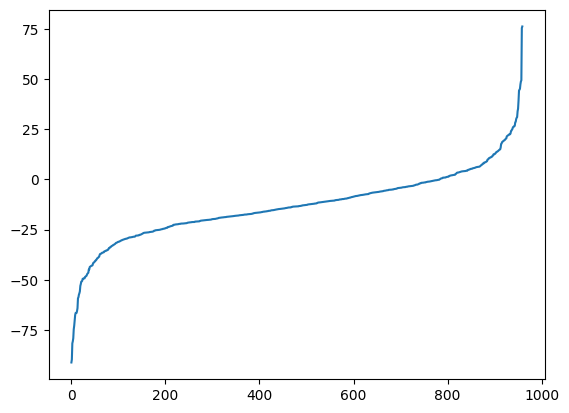

In [21]:
index = np.argsort([np.sum([e[2] for e in d]) for d in data["segments"]])
#index = np.arange(len(data["segments"]))
plt.plot(np.array([np.sum([e[2] for e in d]) for d in data["segments"]])[index])

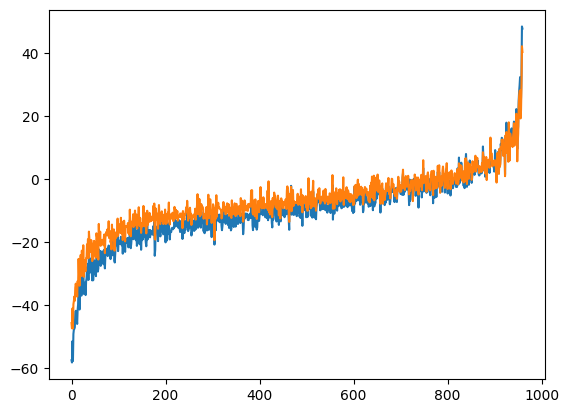

In [22]:
def discounted_sum_numpy(rewards, discount_factor):
    rewards = np.array(rewards)
    n = len(rewards)
    discount_factors = discount_factor ** np.arange(n)
    return np.sum(rewards * discount_factors)

plt.plot(-np.array([d for d in data["opt_gaps"]])[index])
plt.plot(np.array([discounted_sum_numpy([e[2] for e in d], 0.97) for d in data["segments"]])[index])

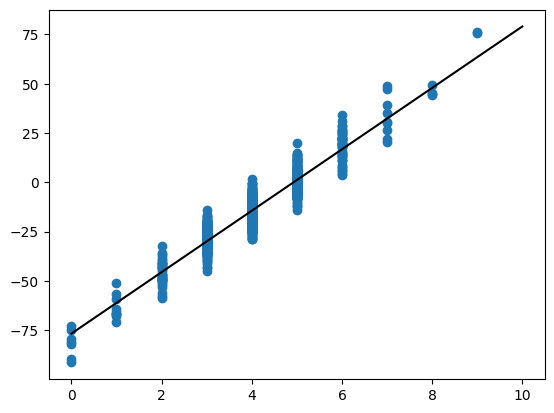

In [23]:
x = np.array([d for d in data["ratings"]])[index]
y = np.array([np.sum([e[2] for e in d]) for d in data["segments"]])[index]
plt.scatter(x, y)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 10, num=100)
# Plot regression line
plt.plot(xseq, a + b * xseq, color="k", lw=1.5)

-20.897294262375794
7.919850142993477


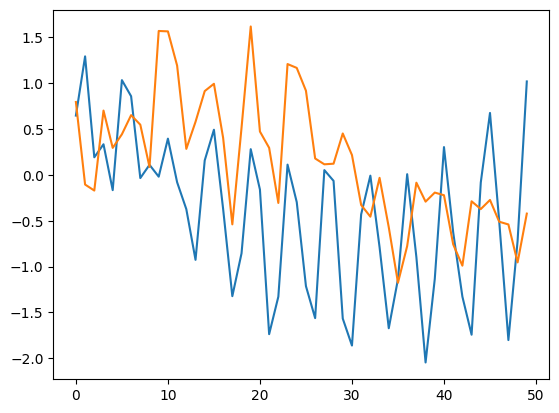

In [24]:
index = data["preferences"][-1][0]
index_2 = data["preferences"][-1][1]
plt.plot([e[2] for e in data["segments"][index]])
plt.plot([e[2] for e in data["segments"][index_2]])
print(np.sum([e[2] for e in data["segments"][index]]))
print(np.sum([e[2] for e in data["segments"][index_2]]))

In [13]:
data["segments"][index][0]

(array([[ -0.56440743,   3.32334982,   0.6678107 ,  -0.60344138,
           0.69303387,  -0.37616047,   0.75109679,  -0.41441511,
           1.59351042,   0.56512079,   0.66610125,  -1.06093438,
           2.64054967,  -1.27244216, -12.84428492,  -6.06407374,
          -2.92480688]]),
 array([-1.        , -1.        ,  0.08283397,  0.84616643, -0.27979288,
         0.18046379], dtype=float32),
 1.1750687634247108,
 False)

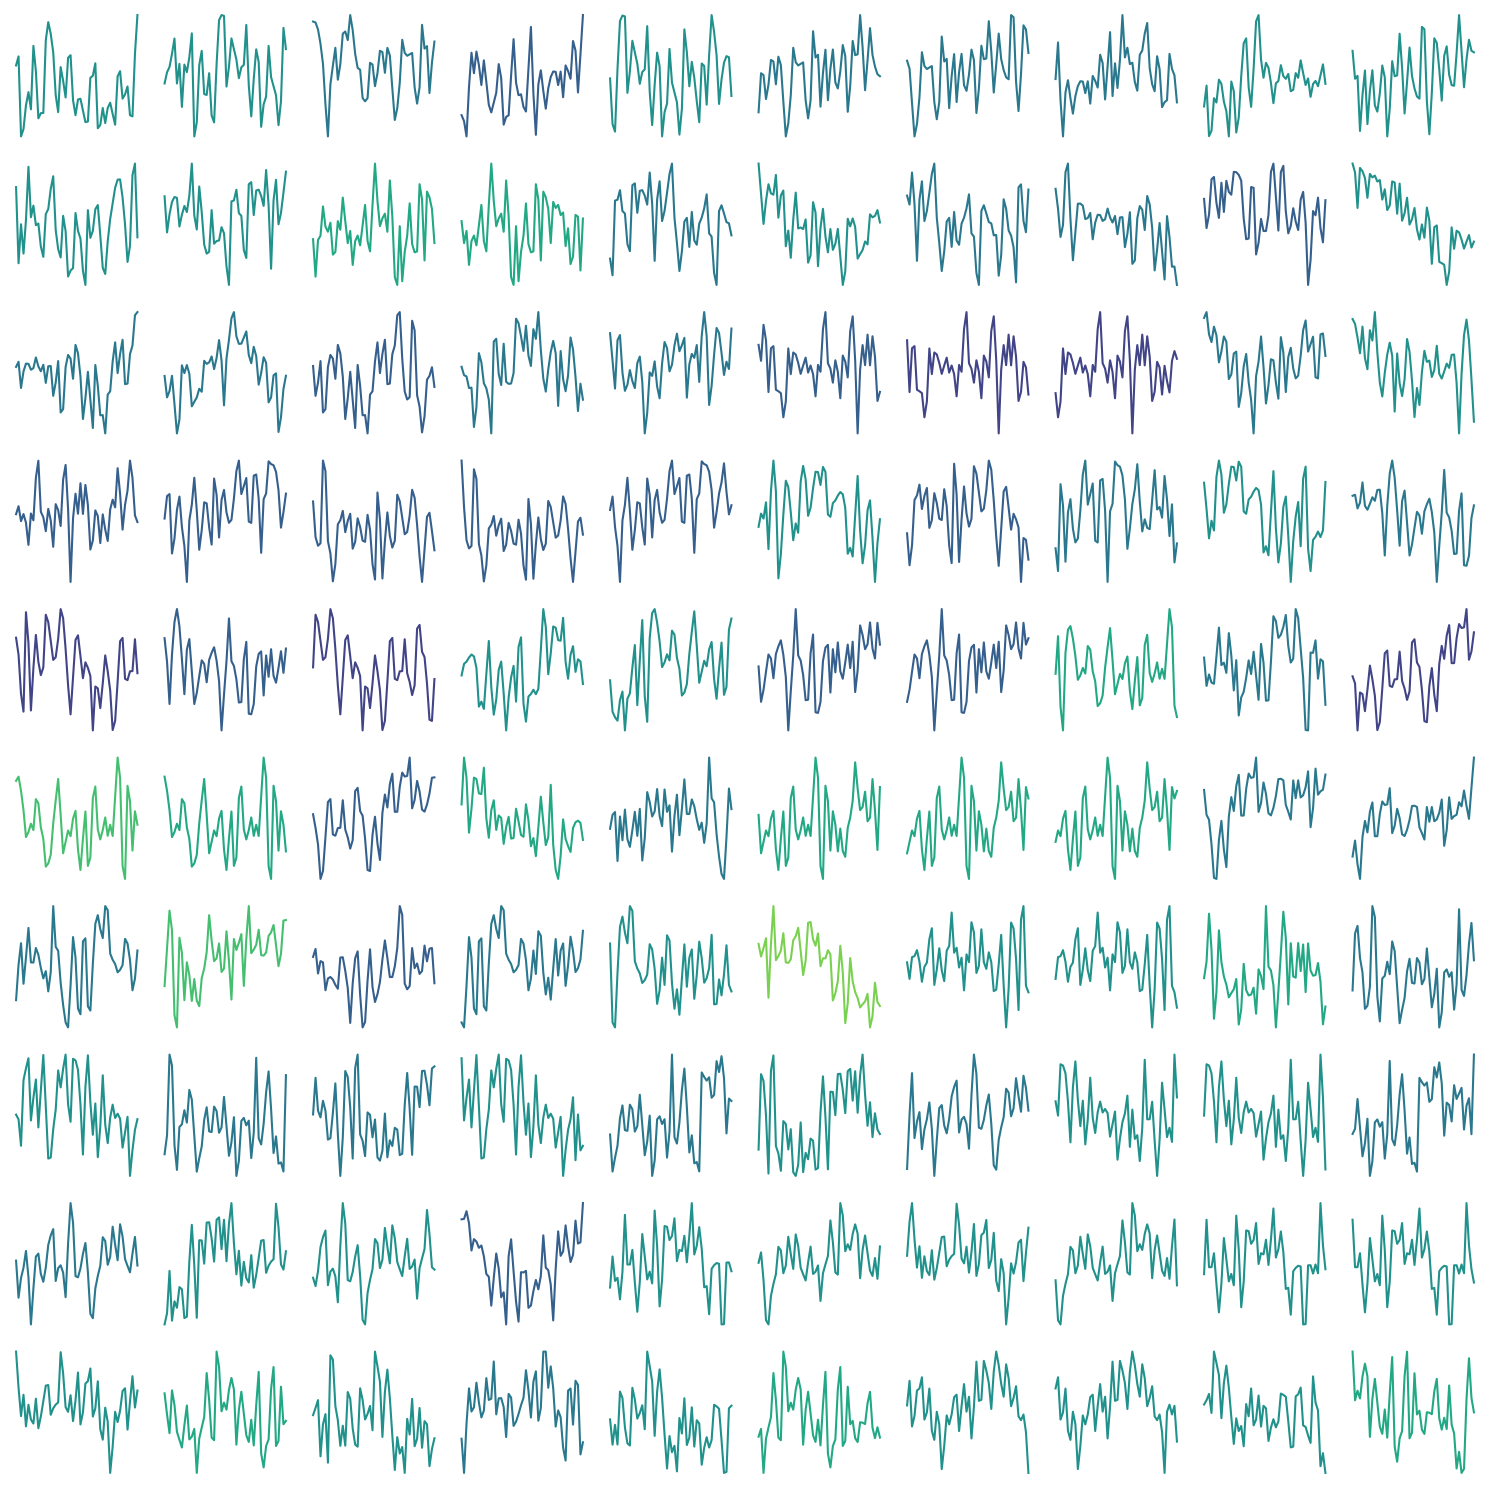

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid of subplots
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
cmap = plt.cm.viridis 
norm = plt.Normalize(0, 10)

# Plot each timeseries on its respective subplot
for i in range(10):
    for j in range(10):
        ax = axes[i, j]
        value = data["ratings"][i * 10 + j]
        color = cmap(norm(value))
        ax.plot([d[2] for d in data["segments"][i * 10 + j]], color=color[:3])
        ax.axis('off')  # Turn off axes for a cleaner look

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
opt_gaps = data["opt_gaps"]
plt.hist(opt_gaps, bins=10)

In [ ]:
def equal_depth_binning_with_indices(data, num_bins):
    # Sort the data and get the original indices
    sorted_indices = np.argsort(data)
    sorted_data = np.sort(data)
    
    # Determine the number of elements per bin
    bin_size = len(data) // num_bins
    remainder = len(data) % num_bins
    
    bins = []
    bin_indices = np.zeros(len(data), dtype=int)
    start = 0
    
    for i in range(num_bins):
        end = start + bin_size + (1 if i < remainder else 0)
        bin_indices[sorted_indices[start:end]] = i + 1
        bins.append(sorted_data[start:end])
        start = end
    
    return bin_indices, bins

max_rating = 10
ratings = max_rating - equal_depth_binning_with_indices(opt_gaps, max_rating)[0]

In [ ]:
def equal_width_binning_with_indices(data, num_bins):
    data = np.array(data)
    # Find the minimum and maximum values in the data
    min_val, max_val = np.min(data), np.max(data)
    
    # Calculate the width of each bin
    bin_width = (max_val - min_val) / num_bins
    
    # Create bin edges
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    
    # Use numpy's digitize function to assign bin indices
    bin_indices = np.digitize(data, bin_edges[:-1])
    
    # Create the bins
    bins = [data[(bin_indices == i)] for i in range(1, num_bins + 1)]
    
    return bin_indices, bins

max_rating = 10
ratings2 = max_rating - equal_width_binning_with_indices(opt_gaps, max_rating)[0]

In [ ]:
#plt.plot(opt_gaps)
plt.plot(ratings)
plt.plot(ratings2)

In [ ]:
def discounted_sum_numpy(rewards, discount_factor):
    rewards = np.array(rewards)
    n = len(rewards)
    discount_factors = discount_factor ** np.arange(n)
    return np.sum(rewards * discount_factors)

segments = data["segments"]

for seg in segments:
    pass
    #print(discounted_sum_numpy([s[2] for s in seg], 0.98) - discounted_sum_numpy([s[2] for s in seg[:-1]], 0.98))

In [ ]:
import pandas as pd

evals = np.load("../main/logs/ppo/Swimmer-v5_1/evaluations.npz")

In [ ]:
index = np.argsort(evals["results"].flatten())
plt.plot(evals["results"].flatten()[index])

In [ ]:
plt.plot(evals["ep_lengths"].flatten()[index])

In [ ]:
[d[1][1] for d in data["segments"][0]]

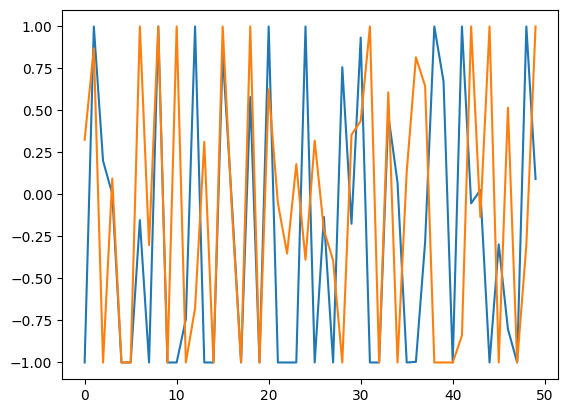

In [25]:
plt.plot([d[1][0] for d in data["segments"][-5]])
plt.plot([d[1][-1] for d in data["demos"][-5]])

In [11]:
data["description"][5]

(array([[ 2.52904906e-02, -2.40667695e-02,  2.92496142e-03,
         -9.41094052e-03, -6.68304407e-04, -6.09120621e-03,
         -3.71852365e-02,  1.54707981e-02,  1.46636379e-01,
          3.59511527e-02, -4.00366567e-01,  1.52413184e+00,
         -1.49803826e+00,  3.06957516e-01, -6.24841606e-01,
          5.31967401e-01, -6.96841265e-02],
        [ 3.40425138e-02, -1.45243766e-01, -2.05317227e-03,
         -1.25485592e-02, -4.26920285e-04, -2.16844147e-01,
         -7.34812142e-03, -7.43665942e-02,  3.07992797e-01,
          2.36485877e-02, -1.47297763e+00,  3.41293947e-01,
         -6.89752961e-01, -4.79707806e-02, -4.67020518e-01,
          1.30303740e+00, -5.63327636e-03],
        [-1.45290797e-02, -1.42529170e-01,  9.20905420e-04,
          1.97916452e-02, -1.02770936e-04, -1.61206723e-01,
         -4.53652604e-02, -6.52622192e-02,  2.51416670e-01,
          4.96167288e-02, -9.95467616e-01, -3.29660816e-03,
          4.68608301e-01, -1.10406629e-01,  4.34168763e-01,
          4.

In [51]:
import pickle as pkl

# Compute statistics env per env (due to memory constraints)
results = {}

# helper function
def discounted_sum_numpy(rewards, discount_factor):
    rewards = np.array(rewards)
    n = len(rewards)
    discount_factors = discount_factor ** np.arange(n)
    return np.sum(rewards * discount_factors)

# get all feedback files matching the environment (they contain the name and the seed)
env = "HalfCheetah-v5"
discount_factors = {
    'HalfCheetah-v5': 0.99,
    'Hopper-v5': 0.999,
    'Swimmer-v5': 0.9999,
    'Ant-v5': 0.98,
    'Walker2d-v5': 0.99,
    'ALE/BeamRider-v5': 0.99,
    'ALE/MsPacman-v5': 0.99,
    'ALE/Enduro-v5': 0.99
}

# Load data
file = "ppo_HalfCheetah-v5_1111.pkl"
print(file)
seed = file.split('.')[0].split('_')[-1]
with open(f"feedback_debug/{file}", 'rb') as f:
    data = pkl.load(f)
    if env not in results:
        results[env] = []
    
    # compute discounted sum of rewards
    index = np.argsort([discounted_sum_numpy([e[2] for e in d], discount_factors[env]) for d in data["segments"]])
    index1 = np.argsort([discounted_sum_numpy([e[2] for e in d], discount_factors[env]) for d in data["demos"]])
    ordered_gt_rews = np.array([discounted_sum_numpy([e[2] for e in d], discount_factors[env]) for d in data["segments"]])[index]

    # opt gaps
    opt_gaps = -np.array([d for d in data["opt_gaps"]])[index]

    # ratings
    ratings = np.array([d for d in data["ratings"]])[index]

    # demo rewards
    ordered_demo_rews = np.array([discounted_sum_numpy([e[2] for e in d], discount_factors[env]) for d in data["demos"]])[index]

    # store data
    results[env].append((ordered_gt_rews, opt_gaps, ratings, ordered_demo_rews))

ppo_HalfCheetah-v5_1111.pkl


960


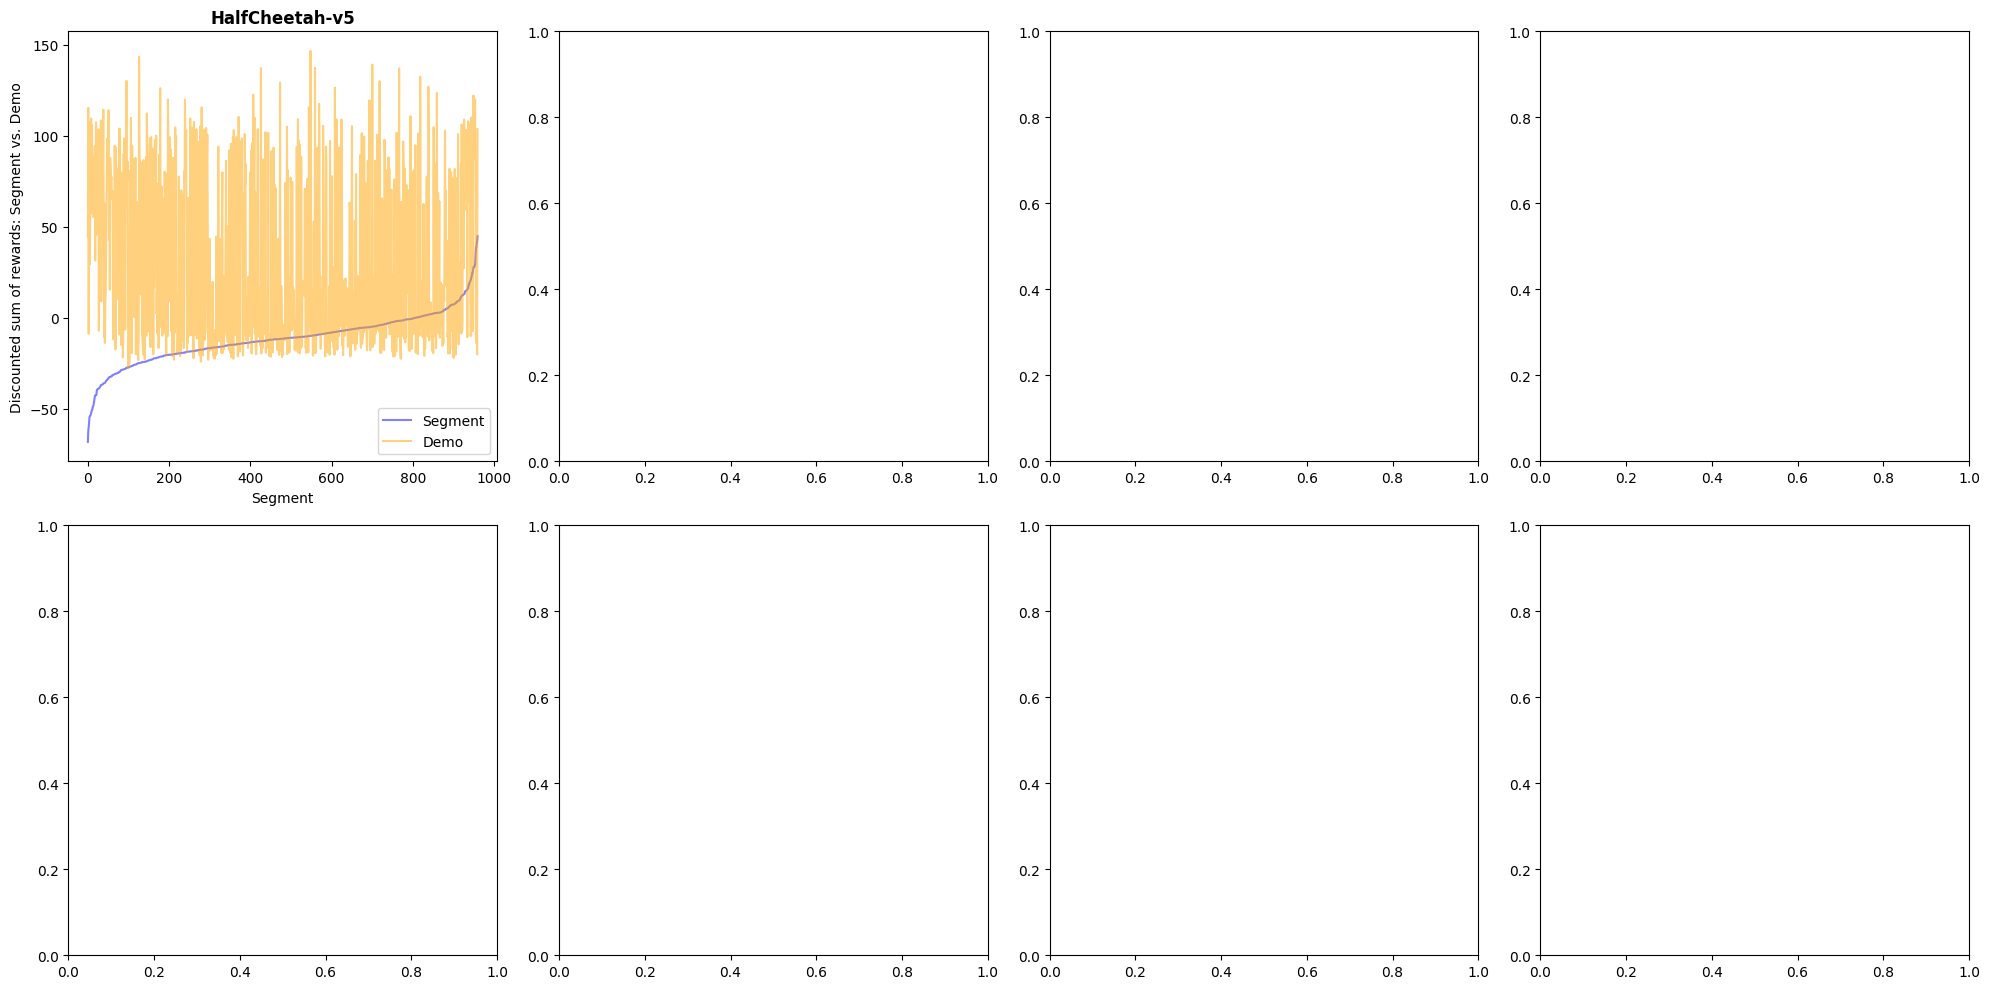

In [52]:
# Instead of ratings, we now want to compare the total rewards between original data ("segments") and demonstrations ("demos").
# make grid plot showing the total rewards for each segment and demo

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, env in enumerate(["HalfCheetah-v5"]):
    ax = axs[i // 4, i % 4]
    for data in results[env]:
        steps = np.arange(len(data[1]))
        print(len(steps))
        ax.plot(steps, data[0], label="Segment", alpha=0.5, color='blue')
        ax.plot(steps, data[3], label="Demo", alpha=0.5, color='orange')
    ax.set_title(env, fontweight='bold')
    ax.set_xlabel("Segment")
    ax.set_ylabel("Discounted sum of rewards: Segment vs. Demo")
    ax.legend()

plt.tight_layout()

plt.savefig("segment_vs_demo_rewards.png")